# 一. Tensor

### 把Pytorch当做Numpy用

In [1]:
import torch
import numpy as np

In [2]:
# 创建一个numpy ndarray
numpy_tensor=np.random.randn(10,20)

我们可以使用**两种方式**将numpy的ndarray转换为torch的tensor
- `torch.Tensor(ndarray)`
- `torch.from_numpy(ndarray)`

In [18]:
pytorch_tensor1=torch.Tensor(numpy_tensor)
pytorch_tensor2=torch.from_numpy(numpy_tensor)
print(pytorch_tensor1)
print(pytorch_tensor2)

tensor([[ 0.3477,  1.7881,  0.1020, -3.0489,  0.7468,  0.5973,  0.5773, -0.0708,
         -1.3510,  0.0036, -0.4196, -1.4115,  0.2081,  1.3612,  1.8832, -2.0351,
         -0.8593, -0.6753,  0.5418,  0.1723],
        [-0.4780, -0.3307, -0.5252, -0.2710,  0.3715, -1.2678, -0.4747,  0.7486,
          0.6462,  0.0216, -1.3910, -0.6312, -0.2180,  0.3948,  0.9092, -0.6908,
          0.6315, -0.7504, -1.6323, -2.4337],
        [-0.3478,  0.1459,  1.4962,  0.8018,  0.2325, -1.3683, -0.2767, -0.6959,
          0.4707, -1.4066, -1.0317, -0.1964,  0.7980, -0.6775, -1.5452,  0.4839,
         -0.0455, -1.1354,  1.3209, -3.0151],
        [ 1.4615, -1.8403, -1.8994, -1.1997, -0.0858,  1.6973,  1.0535,  0.3474,
          1.3348, -1.0051,  0.3828, -0.0168,  0.0653,  1.1355, -0.2066,  0.1851,
         -0.8155,  0.0409,  0.7851,  1.7631],
        [-0.5739, -0.8242,  0.1789,  0.7699, -2.2492,  1.8560,  0.9774,  0.5689,
         -0.2137, -0.6988, -0.1610, -1.2823, -0.8182,  1.5304,  0.6233,  0.4378,
      

我们也可以使用**两种方式**将pytorch tensor转换为numpy ndarray.
- `pytorch_tensor.numpy()`
- `pytorch_tensor.cpu().numpy()`

要注意 GPU 上的 Tensor 不能直接转换为 NumPy ndarray，需要使用.cpu()先将 GPU 上的 Tensor 转到 CPU 上

In [7]:
# 如果pytorch tensor在cpu上
numpy_array=pytorch_tensor1.numpy()
# 如果pytorch tensor在gpu上
numpy_array2=pytorch_tensor1.cpu().numpy()
print(numpy_array)

[[ 3.4766820e-01  1.7881441e+00  1.0196557e-01 -3.0489385e+00
   7.4683952e-01  5.9729457e-01  5.7725328e-01 -7.0792280e-02
  -1.3510040e+00  3.5981829e-03 -4.1961822e-01 -1.4114531e+00
   2.0811097e-01  1.3612109e+00  1.8832421e+00 -2.0351315e+00
  -8.5929310e-01 -6.7529601e-01  5.4178405e-01  1.7229411e-01]
 [-4.7804976e-01 -3.3073229e-01 -5.2518636e-01 -2.7100757e-01
   3.7146404e-01 -1.2677985e+00 -4.7466570e-01  7.4856710e-01
   6.4624727e-01  2.1555670e-02 -1.3909700e+00 -6.3121265e-01
  -2.1798286e-01  3.9482734e-01  9.0921348e-01 -6.9077116e-01
   6.3145703e-01 -7.5043857e-01 -1.6323138e+00 -2.4336519e+00]
 [-3.4777248e-01  1.4593977e-01  1.4962105e+00  8.0181503e-01
   2.3249163e-01 -1.3682561e+00 -2.7667221e-01 -6.9592667e-01
   4.7068948e-01 -1.4066013e+00 -1.0316694e+00 -1.9641460e-01
   7.9799080e-01 -6.7745858e-01 -1.5452449e+00  4.8385838e-01
  -4.5532495e-02 -1.1353710e+00  1.3209026e+00 -3.0151110e+00]
 [ 1.4614625e+00 -1.8402822e+00 -1.8994191e+00 -1.1997403e+00
  -8.

**Pytorch Tensor使用GPU加速**

我们可以使用**两种方式**将Tensor放到GPU上
- 第一种方式是定义cuda数据类型

In [10]:
dtype=torch.cuda.FloatTensor
gpu_tensor=torch.randn(10,20).type(dtype)
print(gpu_tensor)

tensor([[ 0.6777, -0.3711, -0.3406,  0.3745,  0.6361, -1.4560, -0.1334,  0.8859,
         -1.5605,  1.5876, -0.4878, -2.3333, -0.1123, -0.3674, -0.8516,  0.5119,
          0.5832, -0.3235, -0.1700, -0.0802],
        [ 0.4313, -1.3679,  0.1289, -0.5501,  0.6701,  0.5579, -0.4278, -1.2490,
         -1.3132, -0.0976, -0.9721, -1.6348,  1.9039,  1.2731,  1.2103,  0.6920,
          2.2081, -0.3208,  0.8248, -0.0966],
        [ 0.7765, -0.4996,  2.7369, -0.1760, -0.3320, -0.8590,  0.1085,  0.7133,
          0.7077,  0.5117, -0.3836, -1.0927, -1.5854,  0.9764, -0.9618, -0.7143,
         -0.3837, -0.3497,  0.2725,  0.4042],
        [-0.2872,  0.2916, -0.5283,  0.3136,  2.0496,  0.2895,  0.6578,  0.0841,
          0.6005, -0.0792,  1.4756,  0.3967,  0.9111,  0.5229, -0.4172, -0.5235,
         -0.2882, -1.4716, -0.9194,  0.3850],
        [-0.4937,  0.0048,  0.2866,  0.8307, -0.8006,  1.0387,  1.5810,  0.2094,
         -1.5906, -2.1610, -0.7815, -1.1900, -0.5350, -0.7430,  1.7588,  1.0452,
      

- 第二种方式更简单, `tensor.cuda()`, 直接将tensor放到GPU上,类型跟之前的保持一致

In [13]:
gpu_tensor = torch.randn(10, 20).cuda(0) # 将 tensor 放到第一个 GPU 上
#gpu_tensor = torch.randn(10, 20).cuda(1) # 将 tensor 放到第二个 GPU 上, 因为我们只有一个GPU,所以我们注释掉这行代码
print(gpu_tensor)

tensor([[-0.8601, -1.1352, -2.0012,  0.8359,  0.5503,  2.5196, -1.0650, -0.9062,
          0.5819, -1.1395,  0.2407, -0.7685,  0.0436,  0.6902, -0.2149,  0.4144,
         -0.5558,  2.1616,  0.6707, -0.3136],
        [-1.0492, -0.3998, -1.9461, -0.0103, -0.6489,  0.3162,  0.1436,  0.5702,
         -0.9237,  1.2309,  1.0063,  0.8195,  0.3772,  0.4709, -0.6586, -0.4060,
          0.2609,  0.6761, -1.2853, -1.0977],
        [-0.4791, -1.4695, -0.8223,  0.9505, -1.7465,  1.0297, -0.2031,  0.0983,
          0.3556,  0.8551, -0.3529, -0.5691, -0.7239,  1.2712, -0.2156, -0.7473,
          3.1520,  0.3483,  0.6345, -0.4267],
        [ 0.0374, -0.5012, -1.4752, -1.3636,  0.3391,  0.2749,  0.8439,  0.4496,
          0.4624,  1.2606, -0.8003,  0.1185,  1.2116, -1.1107,  0.1377, -0.3489,
          0.0246,  0.9314,  2.0422,  0.8103],
        [-1.1382,  0.1428, -0.4872,  0.3583, -0.1730, -0.4785, -0.7477,  0.8444,
         -0.5530, -3.5062, -0.5724, -0.6495, -1.5996,  1.3975, -0.9476, -0.6514,
      

**Pytorch 将tensor放回CPU**

In [15]:
cpu_tensor=gpu_tensor.cpu()
print(cpu_tensor)

tensor([[-0.8601, -1.1352, -2.0012,  0.8359,  0.5503,  2.5196, -1.0650, -0.9062,
          0.5819, -1.1395,  0.2407, -0.7685,  0.0436,  0.6902, -0.2149,  0.4144,
         -0.5558,  2.1616,  0.6707, -0.3136],
        [-1.0492, -0.3998, -1.9461, -0.0103, -0.6489,  0.3162,  0.1436,  0.5702,
         -0.9237,  1.2309,  1.0063,  0.8195,  0.3772,  0.4709, -0.6586, -0.4060,
          0.2609,  0.6761, -1.2853, -1.0977],
        [-0.4791, -1.4695, -0.8223,  0.9505, -1.7465,  1.0297, -0.2031,  0.0983,
          0.3556,  0.8551, -0.3529, -0.5691, -0.7239,  1.2712, -0.2156, -0.7473,
          3.1520,  0.3483,  0.6345, -0.4267],
        [ 0.0374, -0.5012, -1.4752, -1.3636,  0.3391,  0.2749,  0.8439,  0.4496,
          0.4624,  1.2606, -0.8003,  0.1185,  1.2116, -1.1107,  0.1377, -0.3489,
          0.0246,  0.9314,  2.0422,  0.8103],
        [-1.1382,  0.1428, -0.4872,  0.3583, -0.1730, -0.4785, -0.7477,  0.8444,
         -0.5530, -3.5062, -0.5724, -0.6495, -1.5996,  1.3975, -0.9476, -0.6514,
      

**我们也能访问到Tensor的一些属性**

- 得到tensor的大小: `tensor.shape`, `tensor.size()`,注意`shape`后边没有括号

In [22]:
print(pytorch_tensor1.shape)
print(pytorch_tensor1.size())

torch.Size([10, 20])
torch.Size([10, 20])


- 得到tensor的数据类型: `tensor.type()`

In [23]:
print(pytorch_tensor1.type())

torch.FloatTensor


- 得到tensor的维度: `tensor.dim()`

In [24]:
print(pytorch_tensor1.dim())

2


- 得到tensor的所有元素的个数: `tensor.numel()`

In [25]:
print(pytorch_tensor1.numel())

200


**小练习**

创建一个类型是float64, 大小是3\*2,随机初始化的tensor,将其转化为numpy的ndarray,输出其数据类型 

In [29]:
mytensor=torch.randn(3,2).type(torch.DoubleTensor)
myarray=mytensor.numpy()
print(mytensor)
print(myarray.dtype)

tensor([[ 0.5533,  0.8228],
        [-0.0192,  1.2652],
        [-0.6564,  0.9479]], dtype=torch.float64)
float64


### Tensor的操作
Tensor 操作中的 api 和 NumPy 非常相似，如果你熟悉 NumPy 中的操作，那么 tensor 基本是一致的，下面我们来列举其中的一些操作

#### `torch.ones()`生成全`1`tensor

In [30]:
x=torch.ones(2,2)
print(x)

tensor([[1., 1.],
        [1., 1.]])


#### `torch.type()`得到tensor类型

In [31]:
print(x.type())

torch.FloatTensor


#### 转换tensor数据类型为整形: `tensor.long()`

In [33]:
x=x.long()
print(x)
print(x.type())

tensor([[1, 1],
        [1, 1]])
torch.LongTensor


#### 将整形tensor转换为float类型: `tensor.float()`

In [34]:
x=x.float()
print(x)
print(x.type())

tensor([[1., 1.],
        [1., 1.]])
torch.FloatTensor


#### 沿着行取最大值: `torch.max(tensor, dim=)`

In [37]:
x=torch.randn(4,3)
print(x)
max_value, max_idx=torch.max(x, dim=-1)
print(max_value, max_idx)

tensor([[ 1.6204, -0.4077, -1.3994],
        [-0.8982,  0.4406, -1.8149],
        [-0.8666,  1.0114, -0.7348],
        [ 2.0932, -2.4719, -0.3610]])
tensor([1.6204, 0.4406, 1.0114, 2.0932]) tensor([0, 1, 1, 0])


#### 沿着行对`x`求和: `torch.sum(tensor, dim=)`

In [38]:
sum_x=torch.sum(x,dim=1)
print(sum_x)

tensor([-0.1867, -2.2725, -0.5900, -0.7398])


#### 增加维度或者减少维度: `tensor.unsqueeze()`

In [39]:
print(x.shape)
x=x.unsqueeze(0) #在第一维度增加
print(x.shape)

torch.Size([4, 3])
torch.Size([1, 4, 3])


In [40]:
x=x.unsqueeze(1) #在第二维度增加
print(x.shape)

torch.Size([1, 1, 4, 3])


In [41]:
x=x.squeeze(0) #减少第一个维度
print(x.shape)

torch.Size([1, 4, 3])


In [43]:
x=x.squeeze() #将tensor中所有1维都删掉
print(x.shape)

torch.Size([4, 3])


#### 使用`permute`和`transpose`进行维度交换

In [44]:
x=torch.randn(3,4,5)
print(x.shape)

x=x.permute(1,0,2) #将第0维和第1维交换
print(x.shape)

torch.Size([3, 4, 5])
torch.Size([4, 3, 5])


In [45]:
x=x.transpose(0,2) #将第0维和第2维交换
print(x.shape)

torch.Size([5, 3, 4])


#### 使用`view`对tensor进行reshape

In [46]:
x=torch.randn(3,4,5)
print(x.shape)

x=x.view(-1,5)
print(x.shape)

x=x.view(3,20)
print(x.shape)

torch.Size([3, 4, 5])
torch.Size([12, 5])
torch.Size([3, 20])


#### 两个tensor求和: `torch.add(tensor1,tensor2)`或者`tensor1+tensor2`

In [47]:
x=torch.randn(3,4)
y=torch.randn(3,4)
z1=torch.add(x,y)
z2=x+y
print(z1)
print(z2)

tensor([[-0.4661,  0.0368, -3.1299, -0.4008],
        [ 1.9232, -0.9474,  1.1776,  3.5262],
        [-0.3276,  1.3257,  0.6753, -0.8982]])
tensor([[-0.4661,  0.0368, -3.1299, -0.4008],
        [ 1.9232, -0.9474,  1.1776,  3.5262],
        [-0.3276,  1.3257,  0.6753, -0.8982]])


#### pytorch大多数操作支持inplace原地操作,也就是直接对tensor进行操作而不需要开辟内存空间,方式非常简单,一般是在操作的符号后面加`_`,比如:
- `unsqueeze`进行inplace操作:`unsqueeze_`

In [49]:
x=torch.ones(3,3)
print(x.shape)
#unsqueeze进行
x.unsqueeze_(0)
print(x.shape)

torch.Size([3, 3])
torch.Size([1, 3, 3])


- `transpose()`进行inplace

In [50]:
x.transpose_(1,0)
print(x.shape)

torch.Size([3, 1, 3])


- `add`进行inplace

In [54]:
x=torch.ones(3,3)
y=torch.ones(3,3)
print(x)

x.add_(y)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


#### 小练习
创建一个float32, 4\*4的全为1的矩阵, 将矩阵中间2\*2的矩阵,全部修改为2

In [55]:
x=torch.ones(4,4).float()
x[1:3,1:3]=2
print(x)

tensor([[1., 1., 1., 1.],
        [1., 2., 2., 1.],
        [1., 2., 2., 1.],
        [1., 1., 1., 1.]])


# 二. Variable
tensor 是 PyTorch 中的完美组件，但是构建神经网络还远远不够，我们需要能够构建计算图的 tensor，这就是 **Variable**。Variable 是对 tensor 的封装，操作和 tensor 是一样的，但是每个 Variabel都有三个属性，Variable 中的 tensor本身`.data`，对应 tensor 的梯度`.grad`以及这个 Variable 是通过什么方式得到的`.grad_fn`

#### 导入Variable

In [56]:
from torch.autograd import Variable

#### 将tensor变成Variable

In [57]:
x_tensor=torch.randn(10,5)
y_tensor=torch.randn(10,5)

x=Variable(x_tensor, requires_grad=True) #默认Variable是不需要求梯度的, 所以我们需要用这个方式申明需要对其进行求梯度
y=Variable(y_tensor, requires_grad=True)

#### 得到Variable的数值及获得方式: `variable.data`,`variable.grad_fn`

In [58]:
z=torch.sum(x+y) #不指定dim就把所有元素相加

In [59]:
print(z.data)
print(z.grad_fn)

tensor(-4.6818)


#### 得到Variable的梯度: `variable.grad`

In [65]:
#求x和y的梯度
z.backward()

print(x.data)
print(y.data)
print(x.grad)
print(y.grad)

tensor([[-0.3506, -0.6990, -0.5743,  1.0694, -1.5128],
        [ 1.8279, -1.2237, -0.0016, -0.7818,  0.6222],
        [ 0.1577, -1.4566,  0.9656,  1.5383, -1.1200],
        [-0.4983, -0.1309,  0.9987, -1.5305, -0.0332],
        [-1.6599,  1.3826,  0.0984,  0.1855,  0.1615],
        [ 1.1625, -0.1463,  0.3584, -1.2116,  1.0982],
        [ 1.8765,  0.9613, -0.4388, -1.0859, -0.1459],
        [-0.4789,  0.4323, -0.7594,  0.4259,  0.7395],
        [-0.5352,  1.2512, -1.4089,  0.4248,  1.5354],
        [-0.4910,  0.2200, -0.3206, -0.9860, -1.6786]])
tensor([[ 1.3893, -0.8226,  0.7317,  0.0328,  0.1455],
        [-0.9195, -1.5158,  1.1552,  1.7297,  0.3118],
        [-1.1521,  1.4480,  0.9226, -0.0635, -0.2216],
        [-0.5374,  0.2624, -1.2691,  0.2510, -0.6975],
        [-1.0064,  0.0821, -0.0102, -1.0965, -2.1435],
        [ 1.2014,  2.0558, -1.8242,  1.2707,  0.4972],
        [-0.2413,  1.2036, -1.6684,  1.0253, -1.7398],
        [-1.1352, -0.2039, -0.4351, -0.4966, -0.5288],
        [

#### 小练习
尝试构建一个函数 $y=x^2$,然后求$x=2$的导数

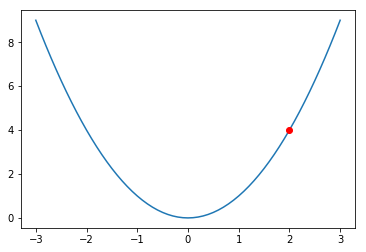

In [67]:
import matplotlib.pyplot as plt
x=np.arange(-3,3.01,0.1)
y=x**2
plt.plot(x,y)
plt.plot(2,4,'ro')
plt.show()

**答案**:

In [68]:
x=Variable(torch.FloatTensor([2]),requires_grad=True)
y=x**2
y.backward()
print(x.grad)

tensor([4.])
